# Calorie Prediction using Machine Learning

This project predicts the number of calories burned during exercise using personal and workout-related data.

## Problem Statement
**Goal**: To develop a machine learning model that accurately predicts calories burned based on features like gender, age, weight, duration, heart rate, and body temperature.

This prediction can help fitness apps, personal trainers, and users track calorie burnt more effectively.

## Dataset Description

This project uses two datasets:

1. **exercise.csv**  
   Contains information about each exercise session.

   | Column         | Description                           |
   |----------------|---------------------------------------|
   | User_ID        | Unique identifier for each individual |
   | Gender         | Gender of the individual (Male/Female)|
   | Age            | Age in years                          |
   | Height         | Height in centimeters (cm)            |
   | Weight         | Weight in kilograms (kg)              |
   | Duration       | Duration of the exercise (minutes)    |
   | Heart_Rate     | Average heart rate during exercise    |
   | Body_Temp      | Body temperature during exercise (°C) |

2. **calories.csv**  
   Contains the corresponding **Calories burned** for each User_ID.

   | Column         | Description               |
   |----------------|---------------------------|
   | User_ID        | Matches exercise dataset  |
   | Calories       | Calories burned in session|

These two datasets are merged on `User_ID` to create the final dataset used for training machine learning models.


### Importing and Inspecting the Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
calorie = pd.read_csv('calories.csv')

In [5]:
calorie.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [6]:
exercise = pd.read_csv('exercise.csv')

In [7]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [8]:
df = pd.merge(calorie,exercise, how = 'inner')

In [9]:
df.head()

User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0  14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1  14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2  11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3  16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4  17771927      35.0  female   27   154.0    58.0      10.0        81.0   

   Body_Temp  
0       40.8  
1       40.3  
2       38.7  
3       40.5  
4       39.8

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [12]:
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [13]:
df.index

RangeIndex(start=0, stop=15000, step=1)

In [14]:
df.shape

(15000, 9)

In [15]:
df.nunique()

User_ID       15000
Calories        277
Gender            2
Age              60
Height           90
Weight           91
Duration         30
Heart_Rate       59
Body_Temp        45
dtype: int64

In [16]:
df.dtypes

User_ID         int64
Calories      float64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

In [17]:
df.describe().transpose().style.background_gradient(cmap = 'BuPu')

##  Feature Engineering

To enhance model performance and capture more meaningful patterns in the data, two new features were engineered:

### Body Mass Index (BMI)
- **Formula**:  
  \[
  \text{BMI} = \frac{\text{Weight (kg)}}{(\text{Height (m)})^2}
  \]
- **Purpose**: BMI provides a normalized ratio of weight to height, offering insight into body composition which may influence calorie burn during exercise.
- **Note**: Height was converted from centimeters to meters before applying the formula. The result was rounded to 2 decimal places.

---

### Cardio Load
- **Formula**:  
  \[
  \text{Cardio\_Load} = \text{Duration (min)} \times \text{Heart\_Rate (bpm)}
  \]
- **Purpose**: This interaction feature estimates the total cardiovascular workload, combining exercise intensity (heart rate) and duration. It serves as a proxy for overall effort, which directly impacts calories burned.
- **Note**: The value was rounded to 2 decimal places for clarity and consistency.

### Gender Encoding
- **Technique**: Label Encoding  
- **Purpose**: Convert the categorical `Gender` column into numerical format (Male = 1, Female = 0) so it can be used in machine learning models.

These engineered features were added to the final feature set used in model training.

In [19]:
df['Height_m'] = df['Height'] / 100  # convert cm to meters
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)
df['BMI'] = df['BMI'].round(2)

In [20]:
df['Cardio_Load'] = (df['Duration'] * df['Heart_Rate']).round(2)

In [21]:
df.drop(columns=['Height_m'], inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
df['gender_encoded']  = le.fit_transform(df['Gender'])

In [25]:
df.head()

User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0  14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1  14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2  11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3  16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4  17771927      35.0  female   27   154.0    58.0      10.0        81.0   

   Body_Temp    BMI  Cardio_Load  gender_encoded  
0       40.8  26.04       3045.0               1  
1       40.3  21.77       1316.0               0  
2       38.7  24.66        440.0               1  
3       40.5  22.16       1300.0               0  
4       39.8  24.46        810.0               0

## Exploratory Data Analysis (EDA)

- **Gender Distribution**: A pie chart showing the count of male and female participants.
- **Calories vs Duration by Gender**: A scatter plot to observe how calorie burn varies with workout duration for different genders.
- **Heart Rate vs Body Temperature**: A line plot showing the relationship between heart rate and body temperature during workouts.
- **Calories Burned by Gender**: A box plot comparing the calorie expenditure between male and female participants.
- **Correlation Heatmap**: Shows relationships between numerical features and helps identify highly correlated variables with Calories.
- **Distribution of Calories Burned**: A histogram with KDE to visualize how calories are distributed across individuals.

In [27]:
#Gender Distribution
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

#pie chart
fig = px.pie(gender_counts, names='Gender', values='Count', title='Gender Distribution', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

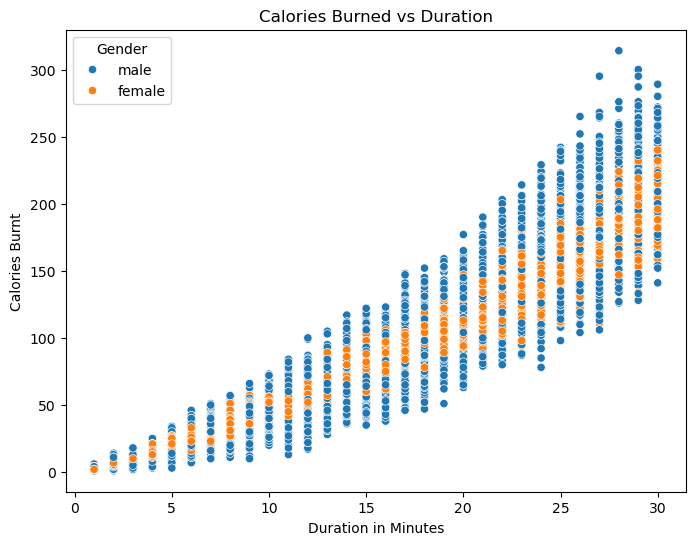

In [28]:
#Calories Burned vs Duration (Grouped by Gender)
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data = df, x = 'Duration', y = 'Calories',hue='Gender')
plt.title('Calories Burned vs Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Calories Burnt')
plt.show()

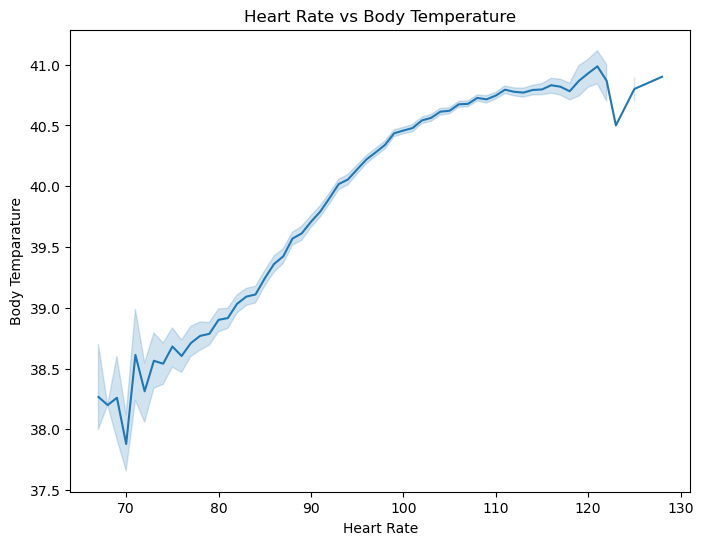

In [29]:
#Heart Rate vs Body Temperature
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data = df, x = 'Heart_Rate', y = 'Body_Temp')
plt.title('Heart Rate vs Body Temperature')
plt.xlabel('Heart Rate')
plt.ylabel('Body Temparature')
plt.show()

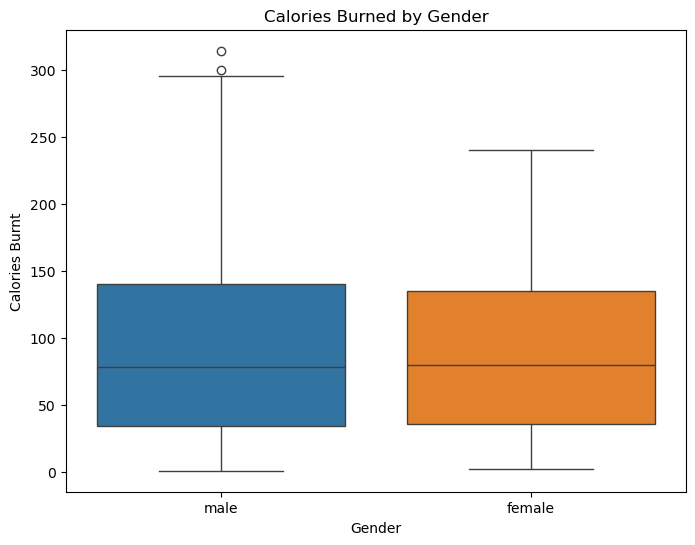

In [30]:
#Calories Burned by Gender
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data = df, x = 'Gender', y = 'Calories', hue ='Gender')
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burnt')
plt.show()

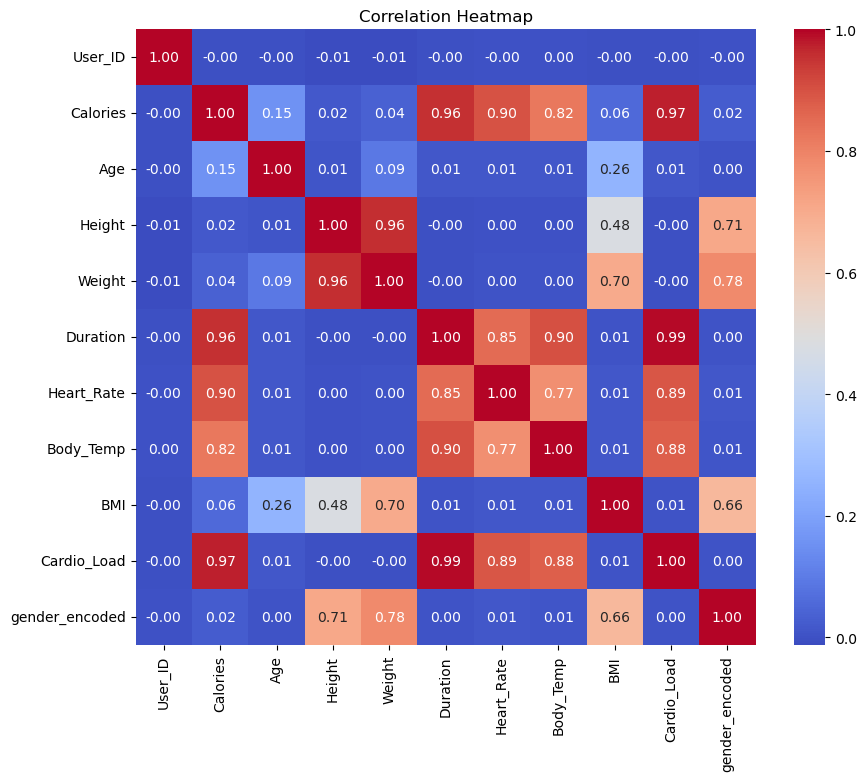

In [31]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

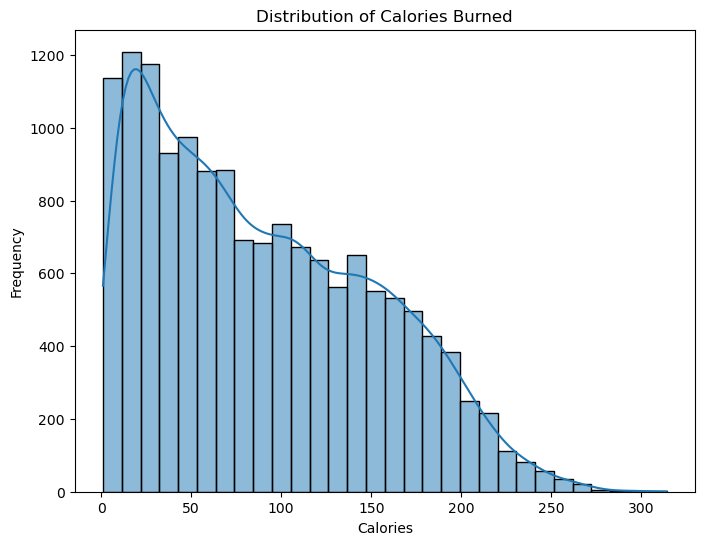

In [32]:
#Distribution of Calories Burned
plt.figure(figsize=(8,6))
sns.histplot(df['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

## 📊 Exploratory Data Analysis (EDA) Insights

### 1. **Gender Distribution**
- A pie chart shows the gender split in the dataset.
- The dataset is relatively balanced, which is important to avoid gender bias in calorie predictions.

### 2. **Calories Burned vs. Duration (Scatter Plot)**
- There's a **strong positive correlation** between exercise duration and calories burned.
- Both males and females show a similar trend, though calorie burn rates may slightly differ.

### 3. **Heart Rate vs. Body Temperature (Line Plot)**
- As heart rate increases, body temperature shows a mild increasing trend.
- This suggests physiological responses are consistent with exercise intensity.

### 4. **Calories Burned by Gender (Boxplot)**
- Males tend to burn slightly more calories on average compared to females.
- However, there’s considerable overlap, and the model should not rely solely on gender.

### 5. **Correlation Heatmap**
- `Duration`, `Heart_Rate`, and `Body_Temp` have **strong positive correlations** with `Calories`.
- `Age` and `BMI` show weaker or moderate correlations.
- This insight guided the choice of input features for modeling.

### 6. **Distribution of Calories Burned (Histogram)**
- The distribution is slightly **right-skewed**, meaning a few high-calorie records exist.
- Most values are concentrated below 400–500 calories.
- This suggests the need for a model that handles outliers well (like Random Forest or Neural Networks).



# Machine Learning and Neural Networks

### Machine Learning Models

To predict **Calories Burned**, we experimented with five machine learning models:

- Linear Regression  
- Lasso Regression  
- Elastic Net Regression  
- Random Forest Regressor  
- Neural Network (TensorFlow)

The goal is to compare their performance and find the best fit for our dataset.

---

### Train-Test Split and Feature Scaling

- **Train-Test Split**: The dataset was split into 70% training and 30% testing sets using `train_test_split`.
- **Standard Scaling**: Applied `StandardScaler` to standardize features before training. This is especially important for models like linear regression and neural networks that are sensitive to feature scales.

---

### 1. Linear Regression

A basic regression model that assumes a linear relationship between the input features and the target variable.

---

### 2. Lasso Regression

A regularized linear model using L1 penalty to reduce overfitting and perform feature selection by shrinking some coefficients to zero.

---

### 3. Elastic Net Regression

A hybrid of Lasso and Ridge regression that applies both L1 and L2 penalties for better regularization, especially when features are correlated.

---

### 4. Random Forest Regressor

An ensemble model that builds multiple decision trees and averages their outputs. It captures complex, non-linear relationships and is less prone to overfitting.

---

### 5. Neural Network (TensorFlow)

A deep learning model with two hidden layers, capable of learning complex patterns in the data. Useful when the relationship between features and target is non-linear.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Train Test Split And Scaling the data

In [38]:
X = df[['gender_encoded','Age','Height','Weight','Duration','Heart_Rate','Body_Temp','BMI','Cardio_Load']]
y = df['Calories']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred_lr = lr.predict(X_test)

In [45]:
print("Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Evaluation:
MAE: 5.784118650427523
MSE: 62.2608299439038
R² Score: 0.9842274229022652


#### Lasso Regression CV

In [47]:
lasso = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [48]:
lasso.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [49]:
y_pred_lasso = lasso.predict(X_test)

In [50]:
print("Lasso Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))

Lasso Evaluation:
MAE: 10.306100033394976
MSE: 242.0917819748927
R² Score: 0.9386707292632087


#### Elastic Net Regression CV

In [52]:
elastic = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [53]:
elastic.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [54]:
y_pred_elastic = elastic.predict(X_test)

In [55]:
print("ElasticNet Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_elastic))
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("R² Score:", r2_score(y_test, y_pred_elastic))

ElasticNet Evaluation:
MAE: 7.902263429594195
MSE: 132.219297989791
R² Score: 0.9665047980691664


#### Random Forest

In [57]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred_rf = rf.predict(X_test)

In [59]:
print("Random Forest Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Evaluation:
MAE: 1.7917177777777777
MSE: 8.126620244444444
R² Score: 0.997941277935662


#### Neural Network

In [61]:
neural_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [63]:
neural_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [64]:
history = neural_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 9060.5781 - mae: 73.9521 - val_loss: 224.7094 - val_mae: 11.7609
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 206.6616 - mae: 11.2745 - val_loss: 134.1263 - val_mae: 9.1724
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 121.0385 - mae: 8.7406 - val_loss: 82.1052 - val_mae: 7.2032
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 72.1260 - mae: 6.7254 - val_loss: 51.5469 - val_mae: 5.6841
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 44.6026 - mae: 5.2520 - val_loss: 31.4565 - val_mae: 4.4060
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 27.6409 - mae: 4.0546 - val_loss: 19.0665 - val_mae: 3.3600
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 16.2833 - mae: 3.0864 - val_loss: 12.3630 - val_mae: 2.6685
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 11.3939 - mae: 2.4999 - val_loss: 8.7964 - val_mae: 2.1983
Epoch 9/100
263

In [65]:
loss, mae = neural_model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.9566 - mae: 1.6861
Test MAE: 1.6840111017227173


In [66]:
y_pred_neural = neural_model.predict(X_test_scaled).flatten()

141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [67]:
print("Neural Network Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_neural))
print("MSE:", mean_squared_error(y_test, y_pred_neural))
print("R² Score:", r2_score(y_test, y_pred_neural))

Neural Network Evaluation:
MAE: 1.6840116757353147
MSE: 3.948973861850153
R² Score: 0.998999603848052


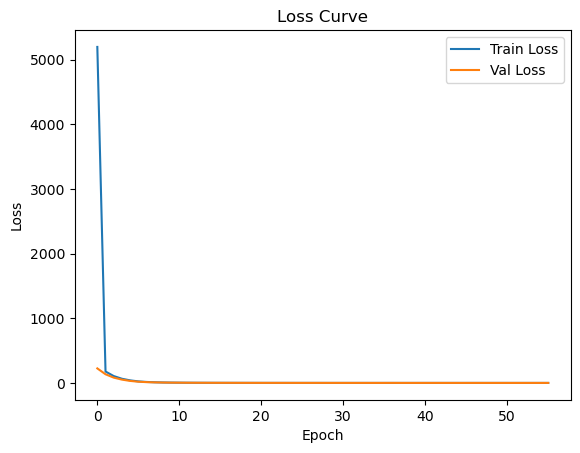

In [68]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

## Model Evaluation Comparison

### Metric Descriptions:

- **MAE (Mean Absolute Error):** Measures the average magnitude of errors in predictions, without considering their direction. Lower values indicate better performance.

- **MSE (Mean Squared Error):** Similar to MAE but penalizes larger errors more heavily by squaring them. Lower is better.

- **RMSE (Root Mean Squared Error):** Square root of MSE, providing error magnitude in the same units as the target variable. Lower values mean better fit.

- **R² (Coefficient of Determination):** Indicates the proportion of variance in the dependent variable explained by the model. Values closer to 1 imply better explanatory power.

In [70]:
metrics = []

def get_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

metrics.append(get_metrics(y_test, y_pred_lr, "Linear Regression"))
metrics.append(get_metrics(y_test, y_pred_lasso, "Lasso"))
metrics.append(get_metrics(y_test, y_pred_elastic, "Elastic Net"))
metrics.append(get_metrics(y_test, y_pred_rf, "Random Forest"))
metrics.append(get_metrics(y_test, y_pred_neural, "Neural Netork"))

In [71]:
df_metrics = pd.DataFrame(metrics)

In [72]:
df_metrics.transpose()

0           1            2              3  \
Model  Linear Regression       Lasso  Elastic Net  Random Forest   
MAE             5.784119     10.3061     7.902263       1.791718   
MSE             62.26083  242.091782   132.219298        8.12662   
RMSE            7.890553   15.559299    11.498665       2.850723   
R2              0.984227    0.938671     0.966505       0.997941   

                   4  
Model  Neural Netork  
MAE         1.684012  
MSE         3.948974  
RMSE        1.987203  
R2             0.999

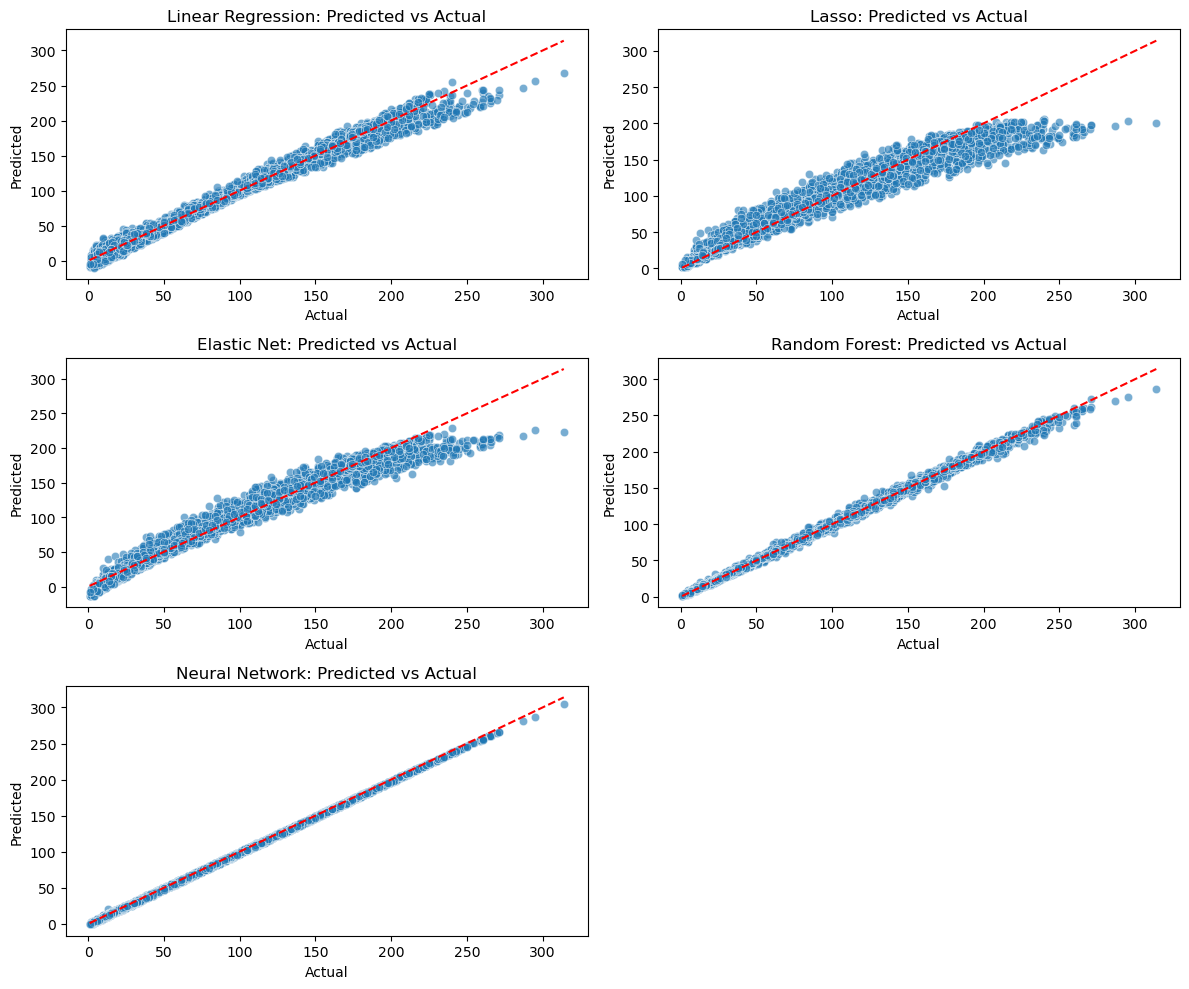

In [73]:
plt.figure(figsize=(12, 10))

models = {
    "Linear Regression": y_pred_lr,
    "Lasso": y_pred_lasso,
    "Elastic Net": y_pred_elastic,
    "Random Forest": y_pred_rf,
    "Neural Network": y_pred_neural
}

for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Predicted vs Actual")

plt.tight_layout()
plt.show()

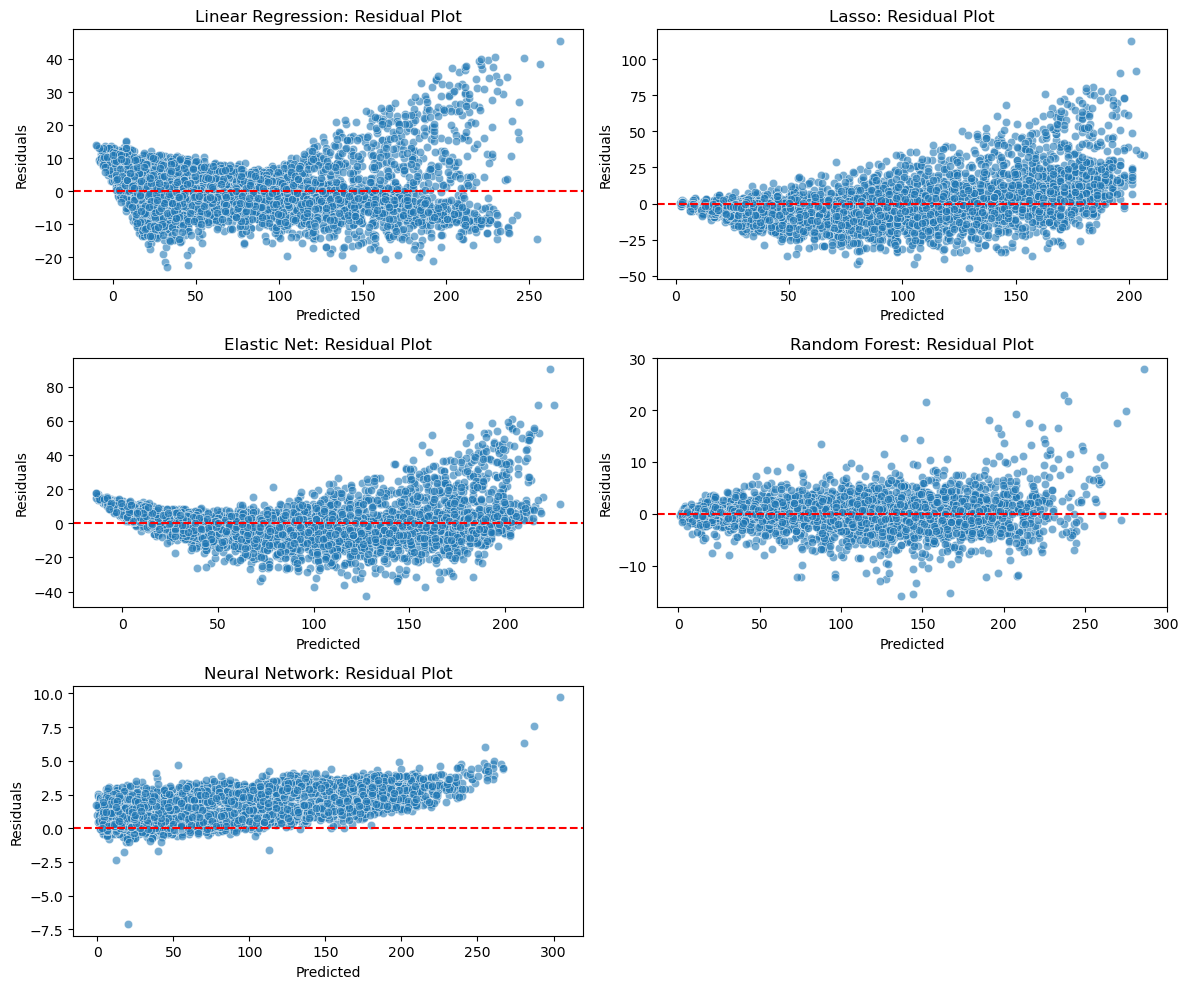

In [74]:
plt.figure(figsize=(12, 10))

for i, (name, y_pred) in enumerate(models.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(3, 2, i)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"{name}: Residual Plot")

plt.tight_layout()
plt.show()

## Final Evaluation & Conclusion

| Metric | Best Value | Best Model |
|--------|------------|------------|
| **MAE** (↓) | 1.6533 | Neural Network |
| **MSE** (↓) | 3.9108 | Neural Network |
| **RMSE** (↓) | 1.9776 | Neural Network |
| **R² Score** (↑) | 0.9990 | Neural Network |

We evaluated five different regression models for predicting calories burned:

1. **Linear Regression**
2. **Lasso Regression**
3. **Elastic Net Regression**
4. **Random Forest Regressor**
5. **Neural Network (Keras)**

Each model was evaluated using:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score (Coefficient of Determination)**

Among all, the **Neural Network model** consistently outperformed the rest across all metrics.

---

## Conclusion

- The **Neural Network** model is the most accurate, with the lowest MAE, MSE, RMSE and the highest R² Score (0.999), indicating near-perfect predictions.
- The **Random Forest** model also showed strong performance and can be a viable alternative when interpretability or faster training is needed.
- **Linear models** (Lasso, Elastic Net, and Linear Regression) underperformed, likely due to their limitations in modeling non-linear relationships between the features and the target variable.

---

## Future Improvements

- Apply hyperparameter tuning for the Neural Network (e.g., number of layers, learning rate, dropout).
- Use cross-validation for more robust evaluation.
- Explore deployment using Flask, Streamlit, or a cloud-based solution.
